## Example 1 : Creating A Basic Scene With Logo and Geometrical Shapes

Manim Community v0.19.0

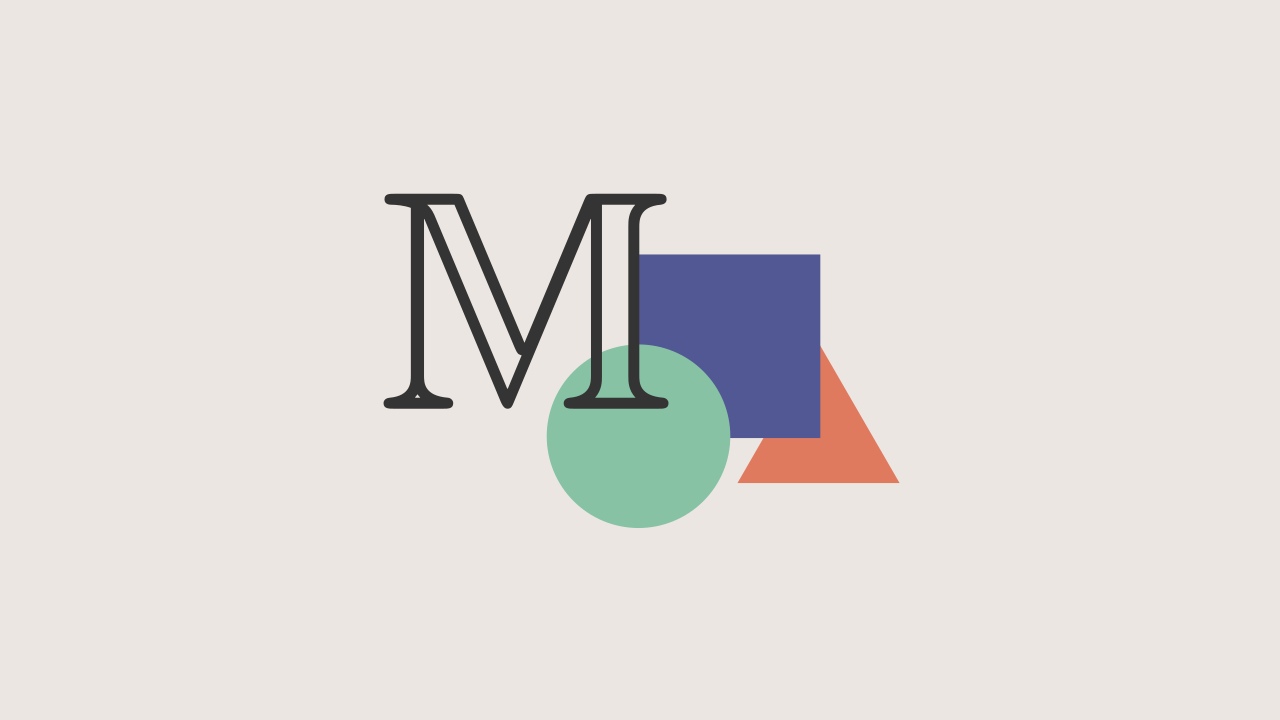

In [2]:
from manim import *

class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{M}", fill_color=logo_black).scale(7)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

%manim -qm -v WARNING ManimCELogo

## Example 2: BraceAnnotation And Labeling

Manim Community v0.19.0

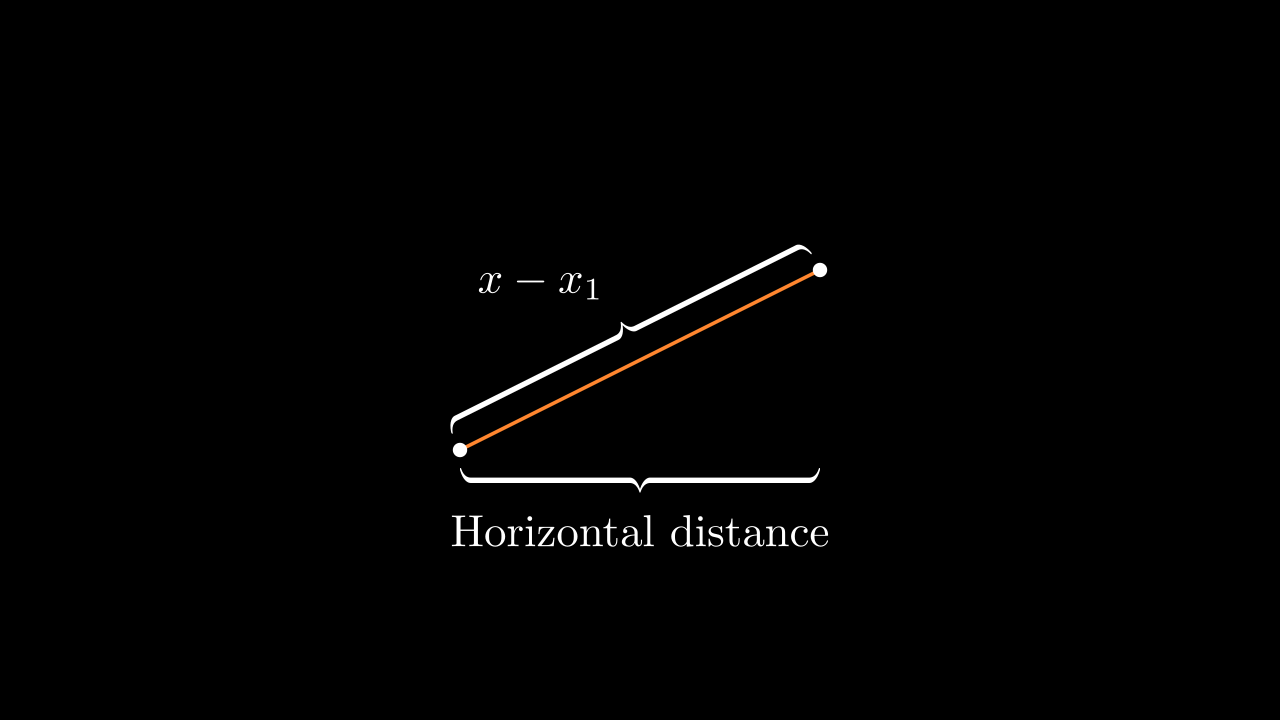

In [ ]:
from manim import *

class BraceAnnotation(Scene):
    def construct(self):

        # Does to Connect Lines
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])

        # Build lines from dots
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)

        # curly braces
        b1 = Brace(line)
        b1text = b1.get_text("Horizontal distance")

        # curly braces rotated 90 degrees
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        b2text = b2.get_tex("x-x_1")
        
        self.add(line, dot, dot2, b1, b2, b1text, b2text)

%manim -qm -v WARNING BraceAnnotation

## Example: VectorArrow 

Manim Community v0.19.0

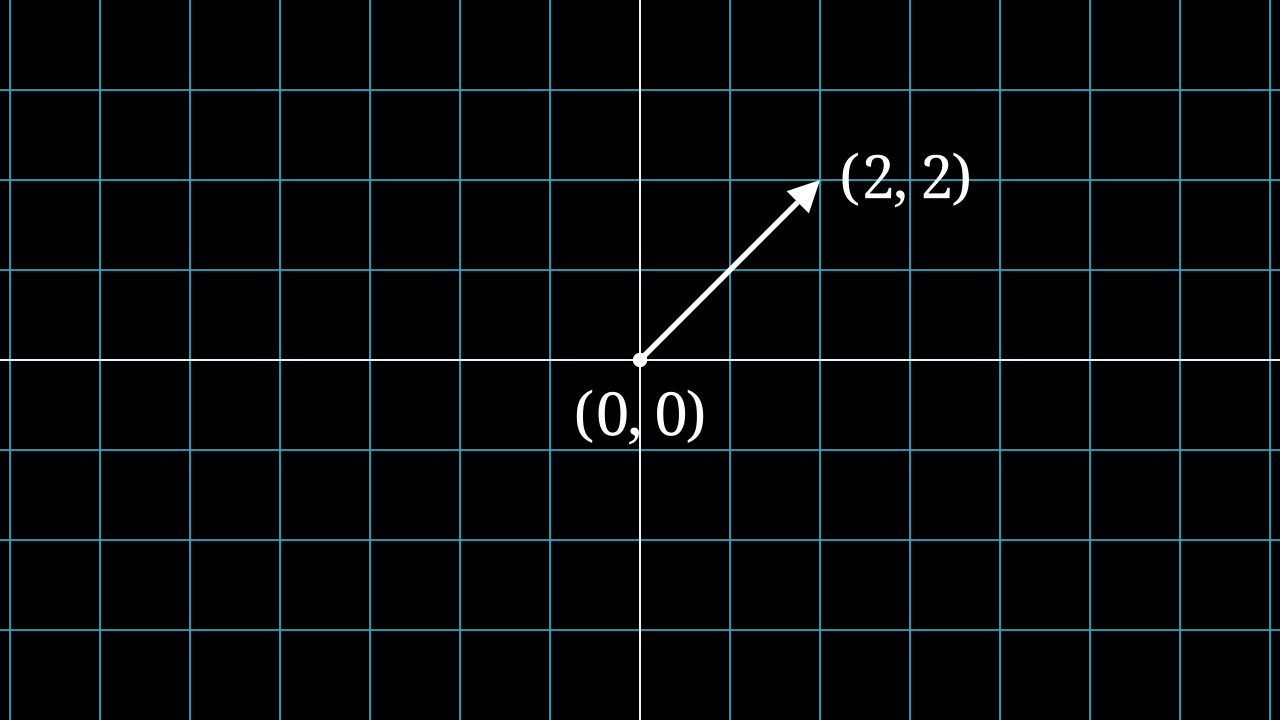

In [ ]:
from manim import *

class VectorArrow(Scene):

    def construct(self):

        #  Dot at Origin
        dot = Dot(ORIGIN)

        # ending arrow representing the vector: direction of arrow
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)

        # 2D Plane
        numberplane = NumberPlane()

        # Text Annotations
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)

%manim -qm -v WARNING VectorArrow

## Example: GradientImageFromArray

Manim Community v0.19.0

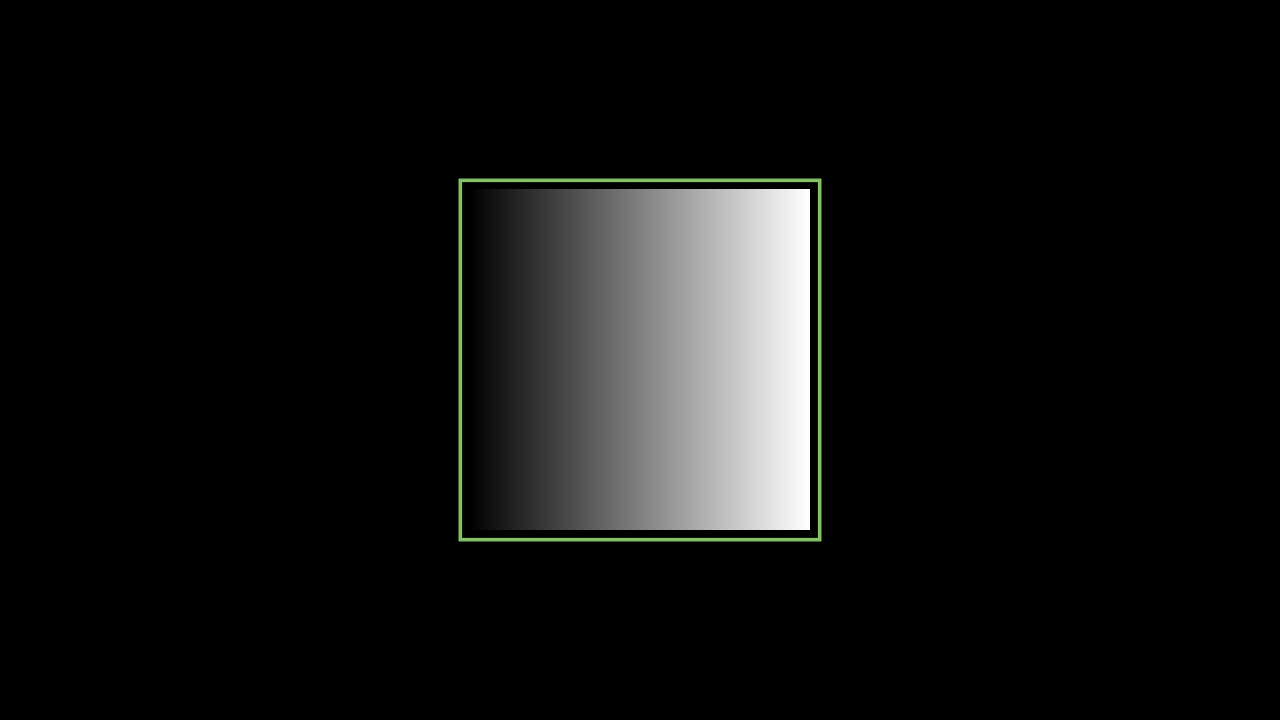

In [7]:
from manim import *

class GradientImageFromArray(Scene):
    def construct(self):
        n = 256

        # image array: Can be replaced with any array of shape (n,n) or image
        imageArray = np.uint8(
            [[i * 256 / n for i in range(0, n)] for _ in range(0, n)]
        )

        # image manim object
        image = ImageMobject(imageArray).scale(2)


        image.background_rectangle = SurroundingRectangle(image, color=GREEN)
        self.add(image, image.background_rectangle)

%manim -qm -v WARNING GradientImageFromArray

## Basic Animations

In [ ]:
from manim import *

class PointMovingOnShapes(Scene):
    def construct(self):

        # Circl
        circle = Circle(radius=1, color=BLUE)

        # dot
        dot = Dot()
        dot2 = dot.copy().shift(RIGHT)
        self.add(dot)

        # line to show radius
        line = Line([3, 0, 0], [5, 0, 0])
        self.add(line)

        # Animations
        self.play(GrowFromCenter(circle))

        # Transform dot to new position => to dot2
        self.play(Transform(dot, dot2))

        # Move dot along circle
        self.play(MoveAlongPath(dot, circle), run_time=2, rate_func=linear)

        # Rotate dot around point
        self.play(Rotating(dot, about_point=[2, 0, 0]), run_time=1.5)

        self.wait()

%manim -qm -v WARNING PointMovingOnShapes

Manim Community v0.19.0

## Example: BooleanOperations 

In [10]:
from manim import *

class BooleanOperations(Scene):
    def construct(self):

        # Two overlapping ellipses
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)

        # Grouping and positioning
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)

        # Animations
        self.play(FadeIn(ellipse_group))

        # Boolean Operations
        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        # Union
        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))
        
        # Exclusion
        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        # Difference
        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))



%manim -qm -v WARNING BooleanOperations

Manim Community v0.19.0

## Example: MovingAngle 

In [ ]:
from manim import *

class MovingAngle(Scene):
    def construct(self):
        rotation_center = LEFT

        # Angle that moves with changing theta: starting at 110 degrees
        theta_tracker = ValueTracker(110)
        line1 = Line(LEFT, RIGHT)
        line_moving = Line(LEFT, RIGHT)
        line_ref = line_moving.copy()
        line_moving.rotate(
            theta_tracker.get_value() * DEGREES, about_point=rotation_center
        )

        # Angle and theta text
        a = Angle(line1, line_moving, radius=0.5, other_angle=False)
        tex = MathTex(r"\theta").move_to(
            Angle(
                line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
            ).point_from_proportion(0.5)
        )

        # Adding updaters and animations
        self.add(line1, line_moving, a, tex)
        self.wait()

        # Updater to rotate line according to theta_tracker value
        line_moving.add_updater(
            lambda x: x.become(line_ref.copy()).rotate(
                theta_tracker.get_value() * DEGREES, about_point=rotation_center
            )
        )

        # Updaters to update angle and theta text position
        a.add_updater(
            lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        )
        tex.add_updater(
            lambda x: x.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
                ).point_from_proportion(0.5)
            )
        )

        # Animations changing theta value
        self.play(theta_tracker.animate.set_value(40))
        self.play(theta_tracker.animate.increment_value(140))
        self.play(tex.animate.set_color(RED), run_time=0.5)
        self.play(theta_tracker.animate.set_value(350))

%manim -qm -v WARNING MovingAngle

Manim Community v0.19.0

## Example: MovingFrameBox 

In [17]:
from manim import *

class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()
        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()

%manim -qm -v WARNING MovingFrameBox

Manim Community v0.19.0